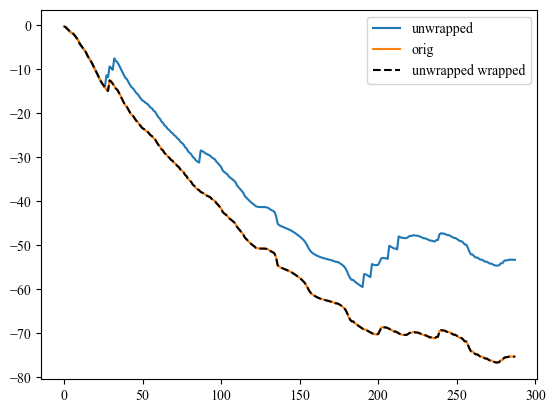

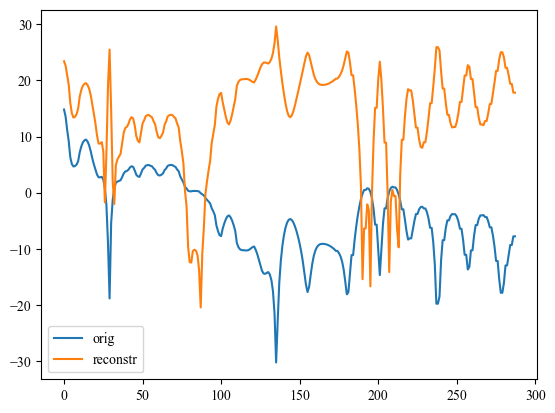

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# script importing
from peak_picking import *
from gradient_delay import *

# SFOAE data loading
mat_SFOAE = scipy.io.loadmat('data/experiment/s007_Lp_35_LcontrSup__R-1.mat')

fx = mat_SFOAE['fx'].flatten()  # frequency axis
amplitude = mat_SFOAE['DPgAlla'].flatten()  # amplitude
phase = mat_SFOAE['DPgAllph'].flatten()  # phase in cycles
wrapped_phase = (2*np.pi*phase + np.pi) % (2 * np.pi) - np.pi
SFOAE = amplitude*np.exp(1j*wrapped_phase)
grad_delay = -np.gradient(phase, fx)

# peak picking
maximas_SFOAE = findLocalMaxima(amplitude)
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_SFOAE = peakNeighbours(maximas_SFOAE, shift, np.size(fx))

fix, ax = plt.subplots()
ax.plot(np.unwrap(np.angle(SFOAE)), label="unwrapped")
ax.plot(phase*2*np.pi, label="orig")
ax.plot(np.unwrap(wrapped_phase), "k--",  label="unwrapped wrapped")
plt.legend()

fix, ax = plt.subplots()
ax.plot(amplitude, label="orig")
ax.plot(np.real(20*np.log10(SFOAE)), label="reconstr")
plt.legend()


ISOINTENSITY (REFERENCE)

In [43]:
from isoint import *

ISOINT_start, ISOINT_stop, ISOINT_step = 1000, 3200, 200

freq_ISOINT_list = []
GD_ISOINT_list = []
max_idx_ISOINT_list = []

for i in range(ISOINT_start, ISOINT_stop + 1, ISOINT_step):
    filename = f"data/isointFT/isoint_{i}Hz_Level_20dB_TM45130.mat"
    freq_ISOINT, group_delay_ISOINT, max_idx_ISOINT = processIsoInt(filename)

    freq_ISOINT_list.append(freq_ISOINT)
    GD_ISOINT_list.append(group_delay_ISOINT)
    max_idx_ISOINT_list.append(max_idx_ISOINT)


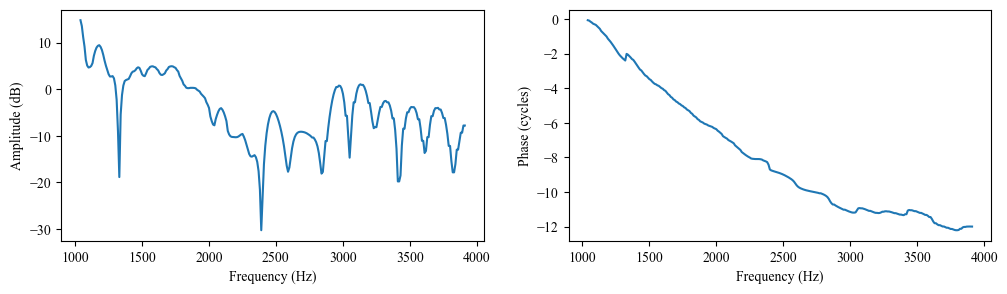

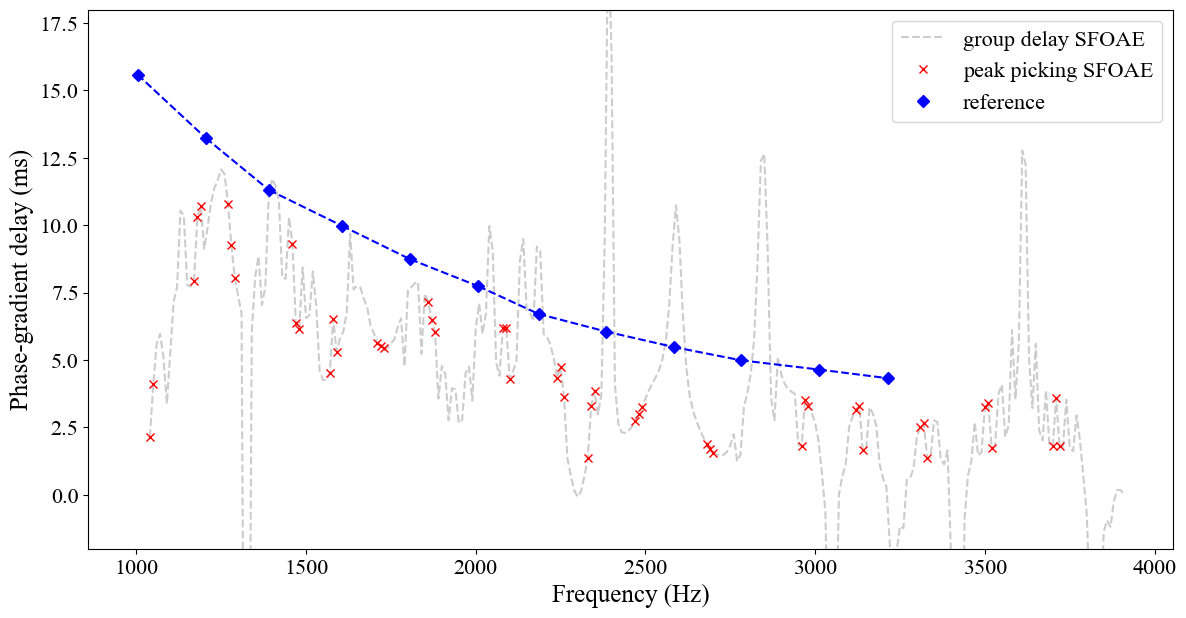

In [44]:
plt.rcParams['font.family'] = 'Times New Roman'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))
ax1.plot(fx, amplitude)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Amplitude (dB)")
ax2.plot(fx, phase)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (cycles)")

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(fx, 1000*grad_delay, '0.8', linestyle='--', label='group delay SFOAE')
ax.plot(fx[ext_maximas_SFOAE], 1000*grad_delay[ext_maximas_SFOAE],
        "rx", label='peak picking SFOAE')

# reference values
for i, freq_ISOINT in enumerate(freq_ISOINT_list):
    max_idx = max_idx_ISOINT_list[i]
    grad_delay_ISOINT = GD_ISOINT_list[i]
    ax.plot(freq_ISOINT[max_idx], 1000*grad_delay_ISOINT[max_idx], "bD",
            label='reference' if i == 0 else None)
    if i > 0:  # connect points starting from the second point
        ax.plot([freq_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]], freq_ISOINT[max_idx]],
                [1000*GD_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]],
                    1000*grad_delay_ISOINT[max_idx]],
                "b--")
        
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Frequency (Hz)', fontdict={"fontsize": 18})
ax.set_ylabel('Phase-gradient delay (ms)', fontdict={"fontsize": 18})
ax.set_ylim(-2, 18)
ax.legend(fontsize=16)
